## Camilo Torres Ovalle
## Wilfredo Vega Buelvas

# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [2]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [3]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
X_train[0,:,:,0] # dimension 1 = 0, dimensión 2 completa, dimensión 3 completa y de la última = 0

array([[ 59,  43,  50, ..., 158, 152, 148],
       [ 16,   0,  18, ..., 123, 119, 122],
       [ 25,  16,  49, ..., 118, 120, 109],
       ...,
       [208, 201, 198, ..., 160,  56,  53],
       [180, 173, 186, ..., 184,  97,  83],
       [177, 168, 179, ..., 216, 151, 123]], dtype=uint8)

In [6]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [7]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
y_train[0]

array([6])

In [10]:
Y_train[0] # 1 Si pertenece a esta categoria y 0 si no

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

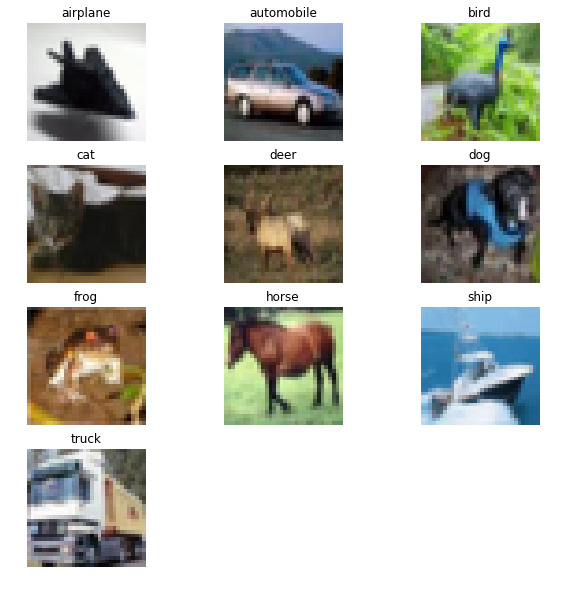

In [11]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten #imput de flatten de 32 x 32
from keras.layers import Conv2D, MaxPooling2D
from livelossplot import PlotLossesKeras

Inicializar

In [13]:
model = Sequential()
model.add(Flatten(input_shape =X_train.shape[1:]))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30730     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


Complilar

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 2.3102 - acc: 0.2235
Epoch 2/50
 - 1s - loss: 2.1489 - acc: 0.2759
Epoch 3/50
 - 1s - loss: 2.1049 - acc: 0.2871
Epoch 4/50
 - 1s - loss: 2.0488 - acc: 0.3079
Epoch 5/50
 - 1s - loss: 2.0376 - acc: 0.3219
Epoch 6/50
 - 1s - loss: 2.0242 - acc: 0.3240
Epoch 7/50
 - 1s - loss: 2.0123 - acc: 0.3290
Epoch 8/50
 - 1s - loss: 1.9891 - acc: 0.3335
Epoch 9/50
 - 1s - loss: 1.9761 - acc: 0.3340
Epoch 10/50
 - 1s - loss: 1.9594 - acc: 0.3416
Epoch 11/50
 - 1s - loss: 1.9575 - acc: 0.3466
Epoch 12/50
 - 1s - loss: 1.9627 - acc: 0.3447
Epoch 13/50
 - 1s - loss: 1.9235 - acc: 0.3583
Epoch 14/50
 - 1s - loss: 1.9323 - acc: 0.3525
Epoch 15/50
 - 1s - loss: 1.9203 - acc: 0.3557
Epoch 16/50
 - 1s - loss: 1.9080 - acc: 0.3561
Epoch 17/50
 - 1s - loss: 1.9053 - acc: 0.3624
Epoch 18/50
 - 1s - loss: 1.8926 - acc: 0.3665
Epoch 19/50
 - 1s - loss: 1.8987 - acc: 0.3624
Epoch 20/50
 - 1s - loss: 1.8784 - acc: 0.3770
Epoch 21/50
 - 1s - loss: 1.8883 - acc: 0.3621
Epoch 22/50
 - 1s - lo

In [16]:
# evaluamos y Predecimos
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 0s 41us/step

acc: 33.07%


# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [17]:
model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32,3)))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Flatten(input_shape =X_train.shape[1:]))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model_1.fit(X_train, Y_train, epochs=10, verbose=2)

Epoch 1/10
 - 11s - loss: 1.8717 - acc: 0.3399
Epoch 2/10
 - 11s - loss: 1.5167 - acc: 0.4731
Epoch 3/10
 - 10s - loss: 1.3781 - acc: 0.5179
Epoch 4/10
 - 11s - loss: 1.3048 - acc: 0.5490
Epoch 5/10
 - 10s - loss: 1.2559 - acc: 0.5589
Epoch 6/10
 - 11s - loss: 1.2147 - acc: 0.5791
Epoch 7/10
 - 10s - loss: 1.1786 - acc: 0.5943
Epoch 8/10
 - 10s - loss: 1.1444 - acc: 0.6019
Epoch 9/10
 - 10s - loss: 1.1178 - acc: 0.6147
Epoch 10/10
 - 10s - loss: 1.0941 - acc: 0.6216


In [20]:
# evaluamos y Predecimos
scores_1 = model_1.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores_1[1]*100))

10000/10000 [==============================] - 4s 444us/step

acc: 55.84%


# Exercise 08.3



Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [21]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [22]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [23]:
xtrainvgg=model_vgg16.predict(X_train)

In [27]:
xtrainvgg.shape

(10000, 1, 1, 512)

In [25]:
xtestvgg=model_vgg16.predict(X_test)

In [26]:
xtestvgg.shape

(10000, 1, 1, 512)

In [28]:

model = Sequential()
model.add(Flatten(input_shape=xtrainvgg.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.fit(xtrainvgg, Y_train, epochs=50,verbose=2)

Epoch 1/50
 - 3s - loss: 1.6768 - acc: 0.4023
Epoch 2/50
 - 2s - loss: 1.4140 - acc: 0.5107
Epoch 3/50
 - 2s - loss: 1.3231 - acc: 0.5393
Epoch 4/50
 - 2s - loss: 1.2680 - acc: 0.5595
Epoch 5/50
 - 2s - loss: 1.2261 - acc: 0.5712
Epoch 6/50
 - 2s - loss: 1.1911 - acc: 0.5842
Epoch 7/50
 - 2s - loss: 1.1567 - acc: 0.5906
Epoch 8/50
 - 2s - loss: 1.1345 - acc: 0.6017
Epoch 9/50
 - 2s - loss: 1.1045 - acc: 0.6182
Epoch 10/50
 - 2s - loss: 1.0814 - acc: 0.6288
Epoch 11/50
 - 2s - loss: 1.0680 - acc: 0.6300
Epoch 12/50
 - 2s - loss: 1.0459 - acc: 0.6382
Epoch 13/50
 - 2s - loss: 1.0295 - acc: 0.6459
Epoch 14/50
 - 2s - loss: 1.0068 - acc: 0.6508
Epoch 15/50
 - 2s - loss: 0.9831 - acc: 0.6627
Epoch 16/50
 - 2s - loss: 0.9685 - acc: 0.6663
Epoch 17/50
 - 2s - loss: 0.9497 - acc: 0.6782
Epoch 18/50
 - 2s - loss: 0.9429 - acc: 0.6776
Epoch 19/50
 - 2s - loss: 0.9239 - acc: 0.6836
Epoch 20/50
 - 2s - loss: 0.8996 - acc: 0.6952
Epoch 21/50
 - 2s - loss: 0.8931 - acc: 0.6958
Epoch 22/50
 - 2s - lo

In [31]:
# evaluamos y Predecimos
scores = model.evaluate(xtestvgg, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 67us/step

acc: 56.71%


# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

In [ ]:
##Cargamos la red preentrenada VGG19

In [44]:
from keras.applications.vgg19 import VGG19
model_vgg19 = VGG19(weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 30s 0us/step


In [45]:
Model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_205 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, None, None, 3 96          conv2d_205[0][0]                 
__________________________________________________________________________________________________
activation_205 (Activation)     (None, None, None, 3 0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_206

batch_normalization_284 (BatchN (None, None, None, 1 576         conv2d_285[0][0]                 
__________________________________________________________________________________________________
batch_normalization_287 (BatchN (None, None, None, 1 576         conv2d_288[0][0]                 
__________________________________________________________________________________________________
activation_285 (Activation)     (None, None, None, 1 0           batch_normalization_284[0][0]    
__________________________________________________________________________________________________
activation_288 (Activation)     (None, None, None, 1 0           batch_normalization_287[0][0]    
__________________________________________________________________________________________________
block17_2_mixed (Concatenate)   (None, None, None, 3 0           activation_285[0][0]             
                                                                 activation_288[0][0]             
__________

In [46]:
X_train_pred_model_vgg19=model_vgg19.predict(X_train)

In [47]:
X_train_pred_model_vgg19.shape

(10000, 1, 1, 512)

In [54]:
X_test_vvg19=model_vgg19.predict(X_test)

In [55]:
X_test_vvg19.shape

(10000, 1, 1, 512)

In [ ]:
#Iniciamos

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_3 = Sequential()
model_3.add(Flatten(input_shape=( 1, 1, 512)))

model_3.add(Dense(6, activation='softmax'))

In [ ]:
#Compilación

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
#Fit

In [53]:
model.fit(X_train_pred_model_vgg19, Y_train, epochs=50,verbose=2)

Epoch 1/50
 - 8s - loss: 3.8831 - acc: 0.3883
Epoch 2/50
 - 3s - loss: 1.8083 - acc: 0.4269
Epoch 3/50
 - 3s - loss: 1.6426 - acc: 0.4710
Epoch 4/50
 - 3s - loss: 1.5729 - acc: 0.4922
Epoch 5/50
 - 3s - loss: 1.5004 - acc: 0.5095
Epoch 6/50
 - 3s - loss: 1.4523 - acc: 0.5242
Epoch 7/50
 - 3s - loss: 1.4010 - acc: 0.5415
Epoch 8/50
 - 3s - loss: 1.3860 - acc: 0.5428
Epoch 9/50
 - 3s - loss: 1.3393 - acc: 0.5663
Epoch 10/50
 - 3s - loss: 1.3281 - acc: 0.5682
Epoch 11/50
 - 3s - loss: 1.3018 - acc: 0.5720
Epoch 12/50
 - 3s - loss: 1.2652 - acc: 0.5814
Epoch 13/50
 - 3s - loss: 1.2330 - acc: 0.5946
Epoch 14/50
 - 4s - loss: 1.2229 - acc: 0.5965
Epoch 15/50
 - 3s - loss: 1.2248 - acc: 0.6015
Epoch 16/50
 - 3s - loss: 1.1878 - acc: 0.6119
Epoch 17/50
 - 4s - loss: 1.1613 - acc: 0.6144
Epoch 18/50
 - 4s - loss: 1.1446 - acc: 0.6263
Epoch 19/50
 - 4s - loss: 1.1388 - acc: 0.6284
Epoch 20/50
 - 4s - loss: 1.1115 - acc: 0.6365
Epoch 21/50
 - 4s - loss: 1.0955 - acc: 0.6379
Epoch 22/50
 - 3s - lo

In [56]:
# evaluamos y Predecimos
scores_3 = model.evaluate(X_test_vvg19, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_3[1]*100))

10000/10000 [==============================] - 4s 415us/step

acc: 54.53%


### Los resultados de la red preentrenada VGG19 no mejorar el accuracy.